In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


In [2]:
train_data = pd.read_csv(r"E:\fliprobo\dataset\Project-Housing_splitted\train.csv")
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [3]:
test_data = pd.read_csv(r"E:\fliprobo\dataset\Project-Housing_splitted\test.csv")
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [4]:
df = pd.concat([test_data, train_data])

In [5]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,NaN
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml,NaN
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,NaN
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,NaN
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000.0
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000.0
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500.0
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000.0


In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1168.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,181477.005993
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.shape

(1460, 81)

In [8]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice        292
Length: 81, dtype: int64

In [9]:
df.isnull().sum().sum()

7257

In [10]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

DESCRIPTION OF COLUMNS:

 1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
df.drop(['Id', 'Utilities', 'Exterior2nd', 'GarageCars', 'TotRmsAbvGrd'], axis=1, inplace = True)
df 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,86.0,14157,Pave,NaN,IR1,HLS,Corner,Gtl,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,NaN
1,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,CulDSac,Gtl,...,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml,NaN
2,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,Inside,Gtl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,NaN
3,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,Inside,Gtl,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,NaN
4,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,CulDSac,Gtl,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000.0
1164,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000.0
1165,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,FR2,Gtl,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500.0
1166,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [96]:

    df['Alley'].replace(np.nan, 'No_access', inplace = True)
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    imp = IterativeImputer(max_iter=10, random_state=0)
    imp.fit(df[['LotFrontage']])
    df[['LotFrontage']] = np.round(imp.transform(df[['LotFrontage']]))
   
    for i in ['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2']:
        df[i].replace(np.nan, 'No_Basement', inplace = True)
    
    df['MasVnrType'].replace(np.nan,df['MasVnrType'].describe().top, inplace = True)
    df[['MasVnrArea']] = np.round(imp.fit_transform(df[['MasVnrArea']]))
    
    df.loc[df.GarageType.isnull(), 'GarageYrBlt'].unique()

    for i in ['GarageType', 'GarageYrBlt', 'GarageFinish','GarageQual','GarageCond']:
        df[i].replace(np.nan, 'No_Garage', inplace = True)
    df['GarageYrBlt'] = df['GarageYrBlt'].astype(str)    
    df['FireplaceQu'].replace(np.nan, 'No_Fireplace', inplace = True)
    df['Electrical'].replace(np.nan,'no_elec_system',inplace=True)
    
    df['PoolQC'].replace(np.nan, 'No_Pool', inplace = True)
    df['Fence'].replace(np.nan, 'No_Fence', inplace = True)
    df['MiscFeature'].replace(np.nan, 'None', inplace = True)
    df[['SalePrice']]=np.round(imp.fit_transform(df[['SalePrice']]))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [97]:
df

array([[-1.16520583, -0.14850937,  0.79321017, ...,  0.39029263,
         0.00849499,  0.17672513],
       [ 1.36148566, -0.14850937,  0.08276164, ..., -2.5621801 ,
        -2.48076141,  0.17672513],
       [-1.16520583, -0.14850937,  0.08276164, ...,  0.39029263,
         0.00849499,  0.17672513],
       ...,
       [ 1.68387458, -0.14850937, -2.72223105, ...,  0.39029263,
         0.00849499, -0.38502928],
       [ 0.6992997 , -3.25227556, -0.94667287, ...,  0.39029263,
         0.00849499, -3.99168978],
       [ 0.49514914, -0.14850937,  0.08276164, ...,  0.39029263,
         0.00849499,  0.2032546 ]])

In [ ]:
df.isnull().sum().sum()

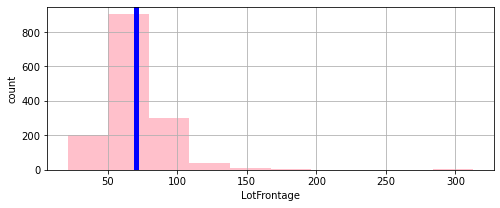

DESCRIPTION  OF LotFrontage :
 count    1460.000000
mean       70.041096
std        22.024031
min        21.000000
25%        60.000000
50%        70.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64


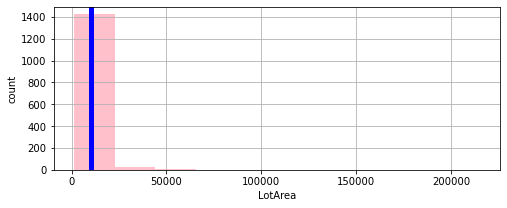

DESCRIPTION  OF LotArea :
 count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


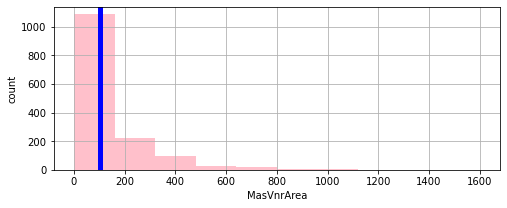

DESCRIPTION  OF MasVnrArea :
 count    1460.000000
mean      103.686986
std       180.569114
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64


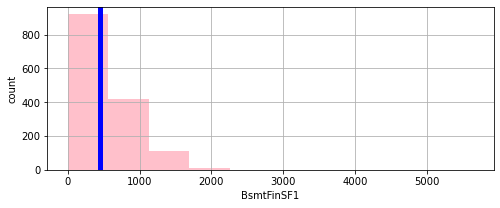

DESCRIPTION  OF BsmtFinSF1 :
 count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


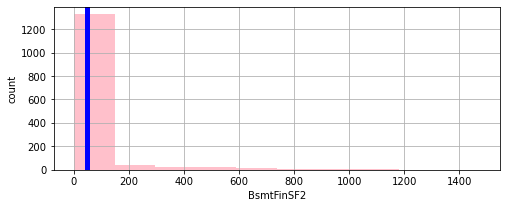

DESCRIPTION  OF BsmtFinSF2 :
 count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


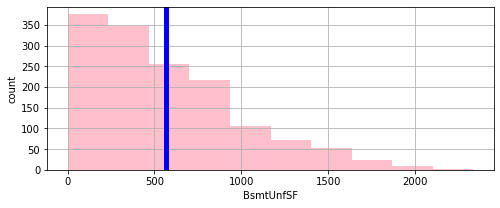

DESCRIPTION  OF BsmtUnfSF :
 count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


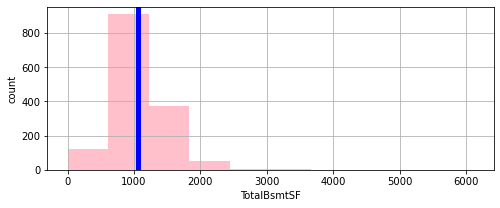

DESCRIPTION  OF TotalBsmtSF :
 count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


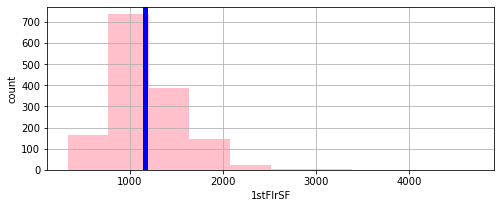

DESCRIPTION  OF 1stFlrSF :
 count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64


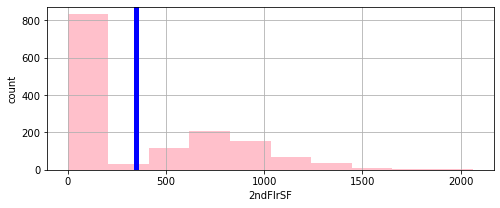

DESCRIPTION  OF 2ndFlrSF :
 count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


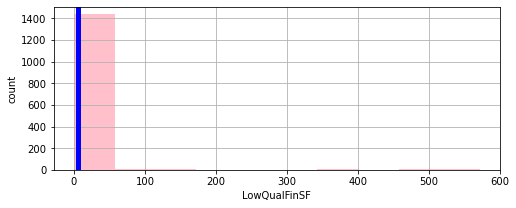

DESCRIPTION  OF LowQualFinSF :
 count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


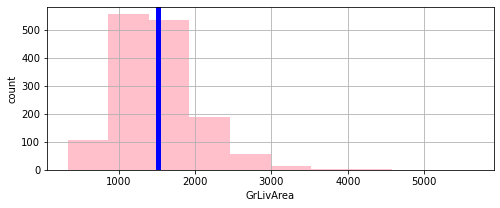

DESCRIPTION  OF GrLivArea :
 count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


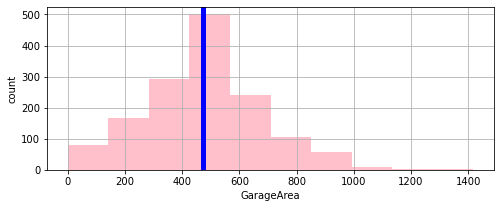

DESCRIPTION  OF GarageArea :
 count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


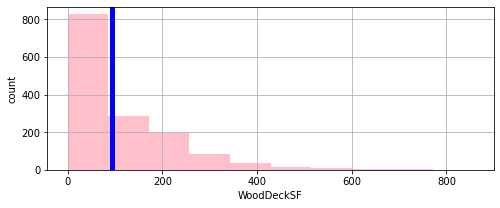

DESCRIPTION  OF WoodDeckSF :
 count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64


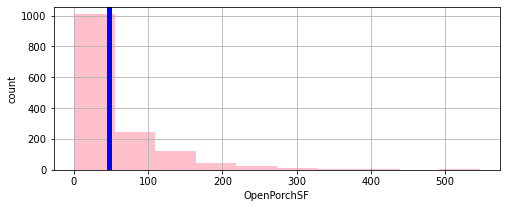

DESCRIPTION  OF OpenPorchSF :
 count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64


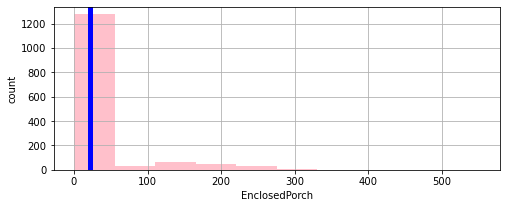

DESCRIPTION  OF EnclosedPorch :
 count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


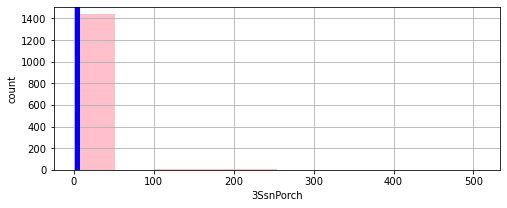

DESCRIPTION  OF 3SsnPorch :
 count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


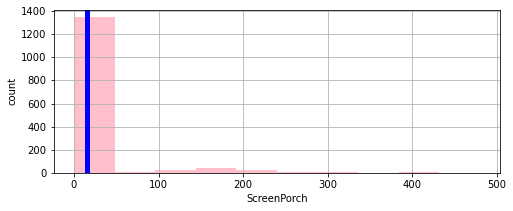

DESCRIPTION  OF ScreenPorch :
 count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64


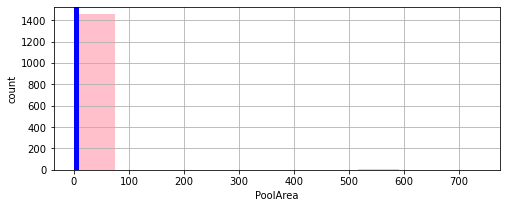

DESCRIPTION  OF PoolArea :
 count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


In [17]:
for i in ['LotFrontage','LotArea',"MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
          '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea','WoodDeckSF',
          'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea']:
    df[i].hist(bins =10,figsize=(8,3), color ="pink")
    plt.axvline(np.mean(df[i]), linewidth = 5, color = "blue", label = "Mean (i)")
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()
    print("DESCRIPTION  OF", i ,":\n",\
          df[i].describe())

In [80]:


for i in target:
    df[i].hist(bins =10,figsize=(8,3), color ="blue")
    plt.axvline(np.mean(df[i]), linewidth = 5, color = "red", label = "Mean (i)")
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()
    print("DESCRIPTION OF SALEPRICE:\n",\
          df[i].describe())

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

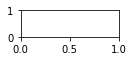

In [81]:
df_1=['LotFrontage','LotArea','MSSubClass', 'MSZoning', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd']
for i in range (0, len(df_1)):
    plt.subplot(7,3,i+1) 
    df[df_1[i]].hist(bins =10,figsize=(20,15), color ="green")
    plt.xlabel(df_1[i])
    plt.ylabel("count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

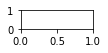

In [82]:
df_2=['RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual']
for i in range (0, len(df_2)):
    plt.subplot(10,4,i+1) 
    df[df_2[i]].hist(bins =10,figsize=(25,20), color ="orange")
    plt.xlabel(df_2[i])
    plt.ylabel("count")
    plt.xticks(rotation=45)
    plt.tight_layout()

In [ ]:
df_3=['Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
     'GarageFinish', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']
for i in range (0, len(df_3)):
    plt.subplot(8,4,i+1) 
    df[df_3[i]].hist(bins =10,figsize=(20,15), color ="blue")
    plt.xlabel(df_3[i])
    plt.ylabel("count")
    plt.xticks(rotation=45)
    plt.tight_layout()

In [83]:
df['GarageYrBlt'].hist(bins =10,figsize=(20,5), color ="lightgreen")
plt.xlabel('GarageYrBlt')
plt.ylabel("count")
plt.xticks(rotation=90)
plt.tight_layout()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [84]:
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [85]:
df_cont_vars = df[['LotFrontage','LotArea', "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea']]
 

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [86]:
df_cv = df_cont_vars
num_cols = df_cv.columns.values

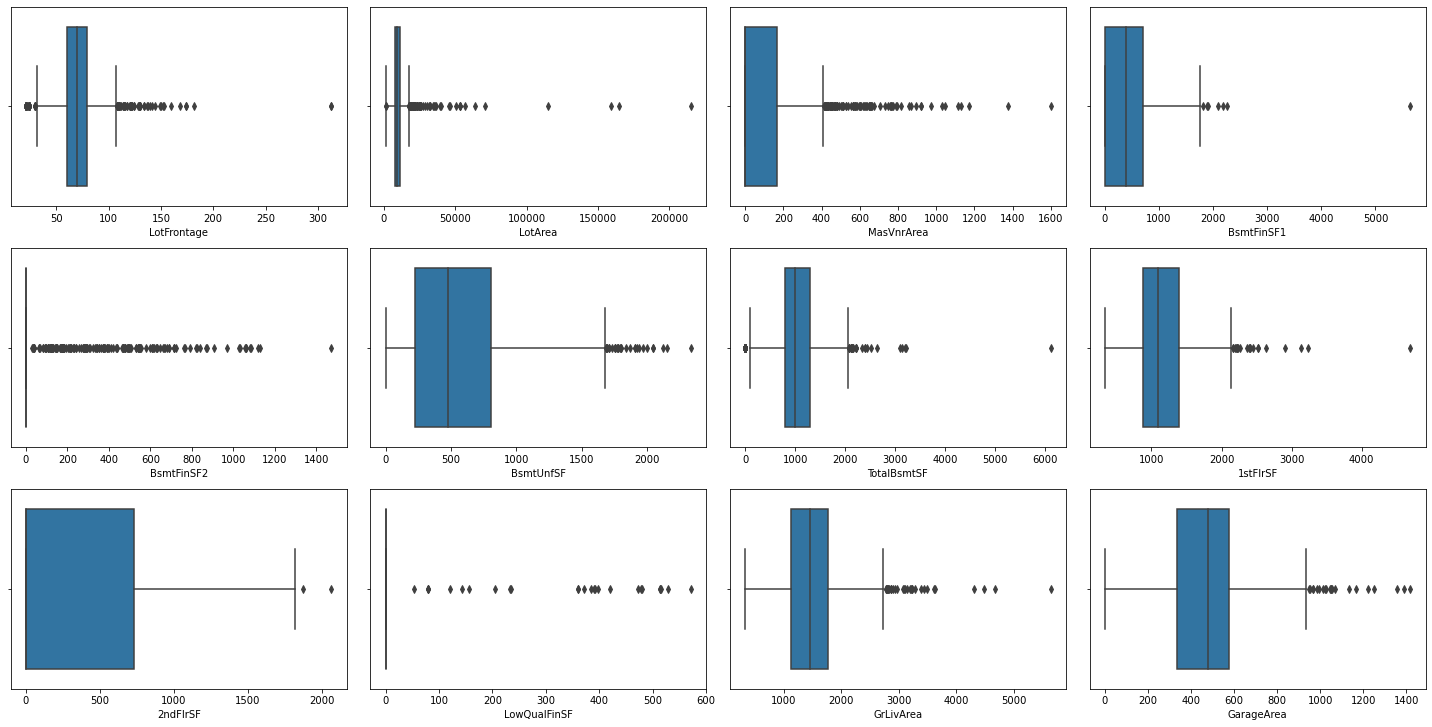

In [93]:
plt.figure(figsize=(20,50))
for i in range (0, len(num_cols)):
    plt.subplot(15,4,i+1)
    ax=sns.boxplot(df_cv [num_cols[i]], orient = "h")
    plt.tight_layout()

 THE SKEWNESS OF THE DATA


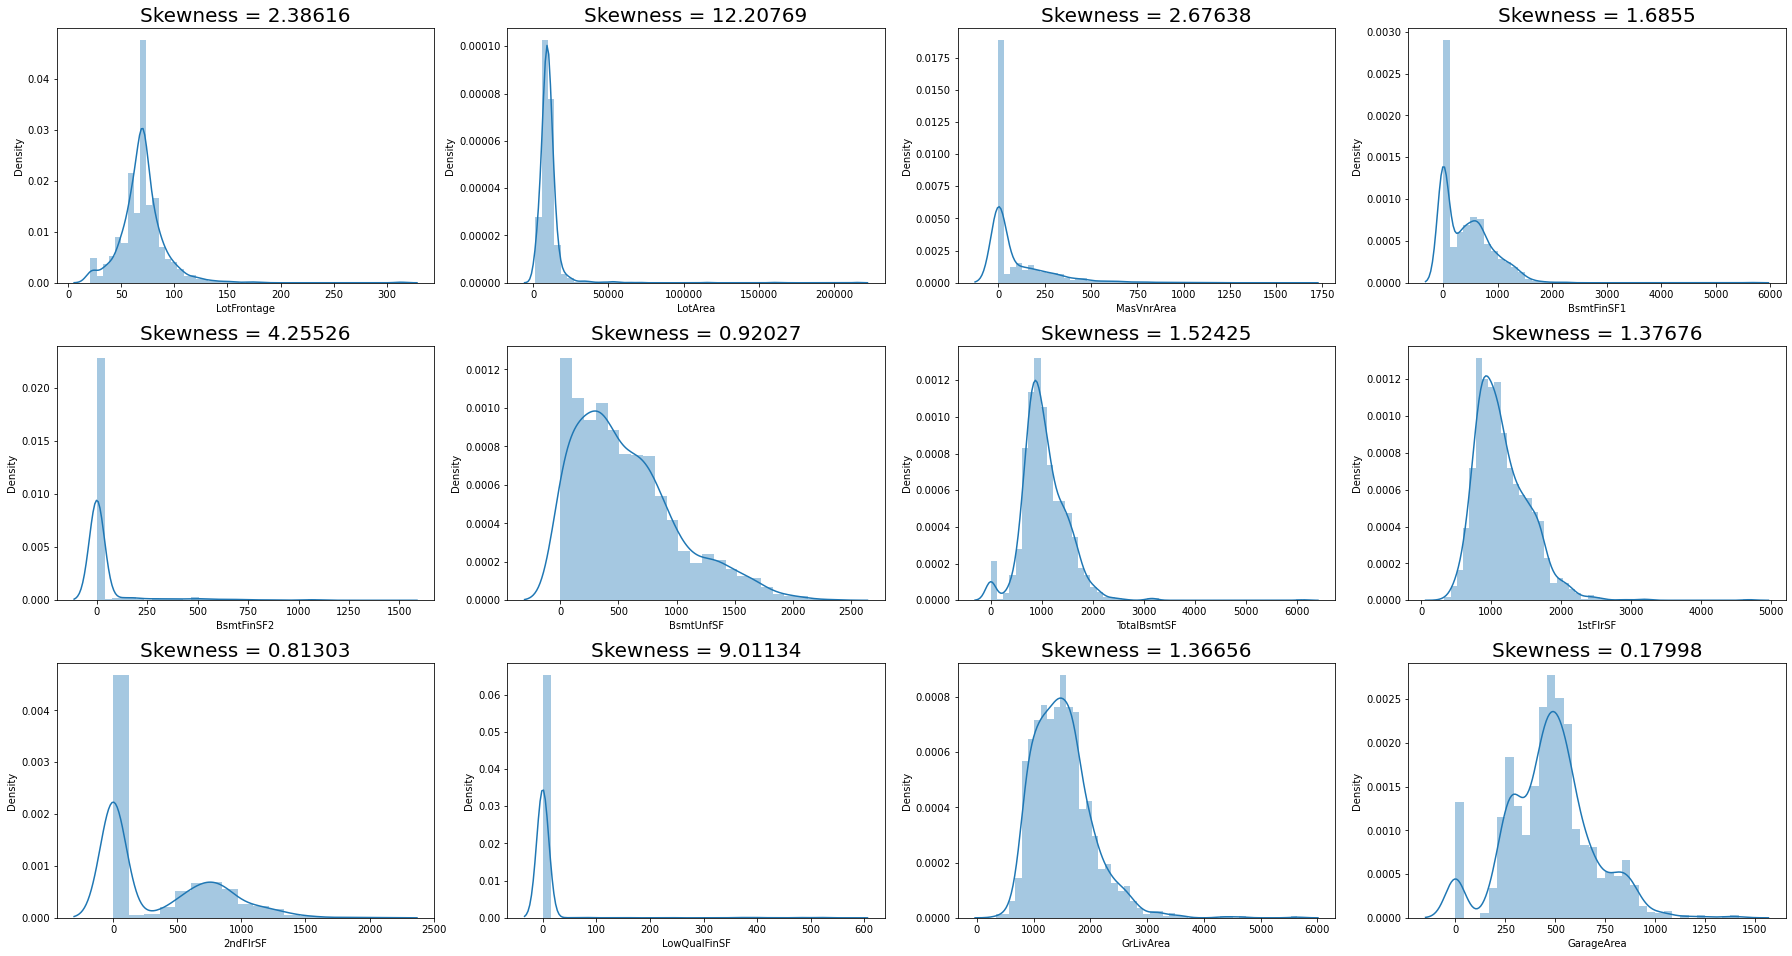

In [94]:
print(" THE SKEWNESS OF THE DATA")
plt.figure(figsize=(25,35))
for i in range (0, len(num_cols)):
    plt.subplot(8,4,i+1)
    plt.title(f"Skewness = {round(df_cv[num_cols[i]].skew(),5)}",fontsize=20)         
    sns.distplot(df_cv[num_cols[i]])
    plt.tight_layout() 

#so we are going to move ahead with outliers as the data loss is high if we remove them

In [95]:
y = df['SalePrice']
X = df.drop(columns=['SalePrice'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
from sklearn.preprocessing import power_transform
Df=power_transform(X,method="yeo-johnson")
Df

In [90]:
Df = X.join(y)
coll = ['MSSubClass', 'MSZoning', 'LotShape', 'BldgType', 'Neighborhood','RoofStyle', 'RoofMatl','Foundation', 'BsmtQual',
       'BsmtCond','Heating', 'HeatingQC','CentralAir', 'Electrical','KitchenQual', 'Fireplaces', 'GarageFinish',
         'GarageQual', 'GarageCond','PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


for i in coll:
    plt.figure(figsize=(20,5))
    mean_cost = np.mean(Df.SalePrice)
    sns.boxplot(x = i,y = "SalePrice", data = Df, palette = "rainbow")
    plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
    plt.title(f"{i} Vs SalePrice", fontsize = 30)
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(20,5))
    sns.barplot(x = i,y = "SalePrice", data = Df, palette = "rainbow")
    plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
    plt.xticks(rotation=45)
    plt.show()

NameError: name 'X' is not defined

In [91]:
Df = X.join(y)
coll = ['MSSubClass', 'MSZoning', 'LotShape', 'BldgType', 'Neighborhood','RoofStyle', 'RoofMatl','Foundation', 'BsmtQual',
       'BsmtCond','Heating', 'HeatingQC','CentralAir', 'Electrical','KitchenQual', 'Fireplaces', 'GarageFinish',
         'GarageQual', 'GarageCond','PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


for i in coll:
    plt.figure(figsize=(20,5))
    mean_cost = np.mean(Df.SalePrice)
    sns.scatterplot(x = i,y = "SalePrice", data = Df, palette = "rainbow")
    plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
    plt.title(f"{i} Vs SalePrice", fontsize = 30)
    plt.xticks(rotation=45)
    plt.show()

NameError: name 'X' is not defined

In [92]:
for i in coll:
    plt.figure(figsize=(20,5))
    mean_cost = np.mean(Df.SalePrice)
    sns.stripplot(x = i,y = "SalePrice", data = Df, palette = "rainbow")
    plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
    plt.title(f"{i} Vs SalePrice", fontsize = 30)
    plt.xticks(rotation=45)
    plt.show()

NameError: name 'coll' is not defined

Key Observations:2-STORY 1946 & NEWER is costlier in MSSubclass, Residential Low Density is costlier in MsZoning, Slightly irregular is costlier in LotShape.
Single Family is costlier in Building Type and Northridge is closire in Neibhorhood place.
Gable Roofing with Standard (Composite) Shingle material is costlier comparatively.
Poured Contrete Foundation and Excellent Basement Quality and with condition Typical - slight dampness property is costlier
Excellent heating Quality in Gas forced warm air furnace and Gas hot water or steam heat is higher.
Central Air conditioned property with Standard Circuit Breakers & Romex and excellent kitchen Quality with max of 11 rooms house is costlier
Three Fire place and good garage with # cars parking area is costlier
Paved Driveway with excellent pool condition, properly fenced with Tennis Court month sold is 7 is very costly.
year sold at 2007 with sale deed type Warranty Deed - Conventional Home was not completed when last assessed is costlier in market.

In [69]:
plt.figure(figsize=(60,40))
sns.heatmap(Df.corr(), annot = True)
plt.show()    

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

<Figure size 4320x2880 with 0 Axes>

In [70]:
#Data scaling Z=(X-mean)/std

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

NameError: name 'X' is not defined

In [71]:
X_scaled.shape[1]

NameError: name 'X_scaled' is not defined

In [72]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

NameError: name 'X_scaled' is not defined

In [73]:
def Data_Preparation(df): # Creating function for Preprocessing the data.
    
    # Droping unwanted features
    df.drop(['Id', 'Utilities', 'Exterior2nd', 'GarageCars', 'TotRmsAbvGrd'], axis=1, inplace = True)
    
    # Imputing the missing Values
    df['Alley'].replace(np.nan, 'No_access', inplace = True)
    
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    imp = IterativeImputer(max_iter=10, random_state=0)
    imp.fit(df[['LotArea','LotFrontage']])
    df[['LotArea','LotFrontage']] = np.round(imp.transform(df[['LotArea','LotFrontage']]))
    
    for i in ['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2']:
        df[i].replace(np.nan, 'No_Basement', inplace = True)
    
    df['MasVnrType'].replace(np.nan,df['MasVnrType'].describe().top, inplace = True)
    df[['MasVnrArea', 'TotalBsmtSF']] = np.round(imp.fit_transform(df[['MasVnrArea', 'TotalBsmtSF']]))

    for i in ['GarageType', 'GarageFinish','GarageQual','GarageCond']:
        df[i].replace(np.nan, 'No_Garage', inplace = True)
        
    df['GarageYrBlt'].replace(np.nan, 0, inplace = True)      
    df['FireplaceQu'].replace(np.nan, 'No_Fireplace', inplace = True)
    df['Electrical'].replace(np.nan,df['Electrical'].describe().top, inplace = True)

    df['PoolQC'].replace(np.nan, 'No_Pool', inplace = True)
    df['Fence'].replace(np.nan, 'No_Fence', inplace = True)
    df['MiscFeature'].replace(np.nan, 'None', inplace = True)
    
    #  Encoding the Data
    cols = df.columns
    nums_cols = df._get_numeric_data().columns

    Cat_col = list(set(cols)-set(nums_cols))
    from sklearn.preprocessing import OrdinalEncoder
    enc = OrdinalEncoder()
 
    for i in Cat_col:
        df[i] = enc.fit_transform(df[i])
    
    #   power_transform the Data to reduce the skewness and outliers
    from sklearn.preprocessing import power_transform
    df=power_transform(df,method="yeo-johnson")
    df 
    
    return df

In [74]:
rf = RandomForestRegressor()
for i in range(0,100):
    X_train,X_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    rf.fit(X_train,y_train)
    pred_train = rf.predict(X_train)
    pred_test= rf.predict(X_test)
    print(f"At random state{i},the training accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{r2_score(y_test,pred_test)}")
    print("\n")

NameError: name 'X_scaled' is not defined

In [75]:
#so as we can interpret random state 87 is giving best train and test accuracy,so we train our model at random state 87:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=87)

NameError: name 'X' is not defined

In [76]:
models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=42), RandomForestRegressor(random_state=42)]

model_names = ["LinearRegression", "Lasso", "Ridge", "ElasticNet", "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "AdaBoostRegressor", "RandomForestRegressor"]
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]

for m in models:
    m.fit(x_train,y_train)
    print("Score of", m, "is:", m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test,predm))
    mean_abs_e.append(mean_absolute_error(y_test,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test,predm))
    mean_sqr_e.append(mean_squared_error(y_test,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 SCORE: ", r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print("**********************************************************************************************************")
    print('\n\n')

NameError: name 'Lasso' is not defined

In [77]:
mean_score=[]
STD=[]
for m in models:
    CV=cross_val_score(m,x_1,y_1,cv=5,scoring="r2")
    print("SCORE OF",m,"IS as follows...")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

NameError: name 'models' is not defined

In [ ]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = "orange")
    plt.title(f"MODEL by {metric}")
    plt.show()

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
RandomForestRegressor(random_state=42)
rf.score(x_test,y_test), rf.score(x_train,y_train)
(0.890212193748729, 0.9768879289793189)
rf.get_params()

In [ ]:
param_grid = [
    {"bootstrap": [True, False],
     "criterion": ["mse", "mae"],
     "n_estimators"      : [10,20,30,50,100],
     "max_features"      : ["auto", "sqrt", "log2"],
     "min_samples_split" : [2,4,8],
    }
]

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.best_score_
0.8504290189576658
grid_search.best_params_
{'bootstrap': False,
 'criterion': 'mae',
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 50}
grid_search.best_estimator_
RandomForestRegressor(bootstrap=False, criterion='mae', max_features='sqrt',
                      n_estimators=50, random_state=42)
reg_final_model = grid_search.best_estimator_
reg_final_model.fit(x_train,y_train)
RandomForestRegressor(bootstrap=False, criterion='mae', max_features='sqrt',
                      n_estimators=50, random_state=42)
reg_final_model.score(x_train,y_train), reg_final_model.score(x_test,y_test)

In [ ]:
We have cleansed our data and prepared for training on splitting it on Target and Feature variable. On training or data with 9 models we have finalize RandomForest Regressor with model score of 97% and with CV-Score of 84%. Further to increase the performance of our model we have hyperparameter tuned our model with GridSearchCV and we have reduced the under fitting and our final model score is 0.999 with grid search bestscore of 0.85. We are saving our model on bestestimator for future prediction...

In [ ]:
Conclusion:
The above study helps us to understand the business of real estate. How the price is changing across the Properties.
With the Study we can tell how multiple real estate amenities like swimming pool, garage, pavement and lawn size of Lot Area, and type of Building raise decides the cost.
With the help of the above analysis we can sketch the needs of a property buyer and according to need we can project the price of the property.

In [ ]:
#so as we can see randomforest regressor is giving best accuracy....so we will select this model
#saving the model to local file system
filename='priceprediction.pickle'
pickle.dump(reg_final_model,open(filename,'wb'))
